In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [2]:
covid_data = pd.read_csv('owid-covid-data.csv')
countries = pd.read_csv('countries of the world.csv')
covid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166326 entries, 0 to 166325
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    166326 non-null  object 
 1   continent                                   156370 non-null  object 
 2   location                                    166326 non-null  object 
 3   date                                        166326 non-null  object 
 4   total_cases                                 163293 non-null  float64
 5   new_cases                                   163133 non-null  float64
 6   new_cases_smoothed                          161150 non-null  float64
 7   total_deaths                                145451 non-null  float64
 8   new_deaths                                  145487 non-null  float64
 9   new_deaths_smoothed                         143390 non-null  float64
 

In [3]:
#Only Need country from the dataset
countries = pd.DataFrame(countries['Country'])

#Casting it to type string and setting it to UpperCase
countries['Country'] = countries['Country'].astype(str).str[0:-1]

#Cleaning Dataset with " " (whitespace) at the back
countries['Country'] = countries['Country'].str.upper()

#Casting it to type string and setting it to UpperCase
covid_data['location'] = covid_data['location'].astype(str).str.upper()

In [4]:
combine = pd.merge(countries, covid_data, how='right',left_on='Country', right_on='location')
combine

,Country,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFGHANISTAN,AFG,Asia,AFGHANISTAN,2020-02-24,5.0,5.0,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFGHANISTAN,AFG,Asia,AFGHANISTAN,2020-02-25,5.0,0.0,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFGHANISTAN,AFG,Asia,AFGHANISTAN,2020-02-26,5.0,0.0,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFGHANISTAN,AFG,Asia,AFGHANISTAN,2020-02-27,5.0,0.0,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFGHANISTAN,AFG,Asia,AFGHANISTAN,2020-02-28,5.0,0.0,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166321,ZIMBABWE,ZWE,Africa,ZIMBABWE,2022-03-01,236871.0,491.0,413.000,5395.0,0.0,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
166322,ZIMBABWE,ZWE,Africa,ZIMBABWE,2022-03-02,237503.0,632.0,416.286,5396.0,1.0,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
166323,ZIMBABWE,ZWE,Africa,ZIMBABWE,2022-03-03,237503.0,0.0,362.286,5396.0,0.0,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
166324,ZIMBABWE,ZWE,Africa,ZIMBABWE,2022-03-04,238739.0,1236.0,467.429,5397.0,1.0,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN


In [5]:
# This is getting the final total up to recent date for cases and deaths for each country
death = pd.DataFrame(combine.groupby(['Country','continent'])["total_deaths"].max()).reset_index(drop=False)
cases = pd.DataFrame(combine.groupby(['Country'])["total_cases"].max()).reset_index(drop=False)
total_cases_million = pd.DataFrame(combine.groupby(['Country'])["total_cases_per_million"].max()).reset_index(drop=False)
vaccination = pd.DataFrame(combine.groupby(['Country'])["people_vaccinated_per_hundred"].max()).reset_index(drop=False)
vaccination_full = pd.DataFrame(combine.groupby(['Country'])["people_fully_vaccinated_per_hundred"].max()).reset_index(drop=False)
gdpcapita = pd.DataFrame(combine.groupby(['Country'])["gdp_per_capita"].max()).reset_index(drop=False)
pop_density = pd.DataFrame(combine.groupby(['Country'])["population_density"].max()).reset_index(drop=False)
cardio_deathrate = pd.DataFrame(combine.groupby(['Country'])["cardiovasc_death_rate"].max()).reset_index(drop=False)
diabetes = pd.DataFrame(combine.groupby(['Country'])["diabetes_prevalence"].max()).reset_index(drop=False)
lifeexpectancy = pd.DataFrame(combine.groupby(['Country'])["life_expectancy"].max()).reset_index(drop=False)
hdi = pd.DataFrame(combine.groupby(['Country'])["human_development_index"].max()).reset_index(drop=False)

#Combining both dataframes and calculating the rate of death per country
death_rate = pd.merge(death, cases, how='inner',left_on='Country', right_on='Country')
death_rate["death_rate"] = round((death_rate["total_deaths"]/death_rate["total_cases"])*100,2)
temp0 = pd.merge(death_rate, total_cases_million, how='inner',left_on='Country', right_on='Country')
temp1 = pd.merge(temp0, vaccination, how='inner',left_on='Country', right_on='Country')
temp2 = pd.merge(temp1, vaccination_full, how='inner',left_on='Country', right_on='Country')
temp3 = pd.merge(temp2, gdpcapita, how='inner',left_on='Country', right_on='Country')
temp4 = pd.merge(temp3, pop_density, how='inner',left_on='Country', right_on='Country')
temp5 = pd.merge(temp4, cardio_deathrate, how='inner',left_on='Country', right_on='Country')
temp6 = pd.merge(temp5, diabetes, how='inner',left_on='Country', right_on='Country')
temp7 = pd.merge(temp6, lifeexpectancy, how='inner',left_on='Country', right_on='Country')
temp8 = pd.merge(temp7, hdi, how='inner',left_on='Country', right_on='Country')
temp8



,Country,continent,total_deaths,total_cases,death_rate,total_cases_per_million,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,gdp_per_capita,population_density,cardiovasc_death_rate,diabetes_prevalence,life_expectancy,human_development_index
0,AFGHANISTAN,Asia,7622.0,174331.0,4.37,4376.280,12.32,10.62,1803.987,54.422,597.029,9.59,64.83,0.511
1,ALBANIA,Europe,3478.0,272030.0,1.28,94687.173,44.23,41.73,11803.431,104.871,304.195,10.08,78.57,0.795
2,ALGERIA,Africa,6853.0,265227.0,2.58,5944.578,16.71,13.62,13913.839,17.348,278.364,6.73,76.88,0.748
3,ANDORRA,Europe,151.0,38434.0,0.39,496858.598,74.72,68.84,NaN,163.755,109.135,7.97,83.73,0.868
4,ANGOLA,Africa,1900.0,98796.0,1.92,2911.450,31.21,16.06,5819.495,23.890,276.045,3.94,61.15,0.581
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185,VIETNAM,Asia,40726.0,4232520.0,0.96,43114.704,80.90,78.53,6171.884,308.127,245.465,6.00,75.40,0.704
186,WALLIS AND FUTUNA,Oceania,7.0,454.0,1.54,40923.021,58.14,57.68,NaN,NaN,NaN,NaN,79.94,NaN
187,YEMEN,Asia,2135.0,11775.0,18.13,386.184,2.02,1.22,1479.147,53.508,495.003,5.35,66.12,0.470
188,ZAMBIA,Africa,3958.0,313744.0,1.26,16582.088,13.15,10.48,3689.251,22.995,234.499,3.94,63.89,0.584


3. Vaccination rate:
  can do something similar to spendings (x axis is vaccination rate, y axis is covid cases, then plot the linear regression in scatter plot)

4. Duration of lockdown:
  do similar things to spendings (x is lockdown duration in days, y is covid cases, then plot linear regression) --> do boxplot with all data samples for lockdown alone to come up with mean median etc...


developed: US, CANADA, AUSTRALIA, NEW ZEALAND, JAPAN , FRANCE, KOREA, SINGAPORE, CHINA

developing: south africa, nigeria, kenya, ghana, india, afghanistan, brunei, malaysia, philippines, thailand, indonesia

In [6]:
USA_data = temp8[temp8["Country"] == 'UNITED STATES']
USA_data

,Country,continent,total_deaths,total_cases,death_rate,total_cases_per_million,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,gdp_per_capita,population_density,cardiovasc_death_rate,diabetes_prevalence,life_expectancy,human_development_index
180,UNITED STATES,North America,958437.0,79265726.0,1.21,238095.936,76.5,64.84,54225.446,35.608,151.089,10.79,78.86,0.926


In [7]:
temp8['Country']

0            AFGHANISTAN
1                ALBANIA
2                ALGERIA
3                ANDORRA
4                 ANGOLA
             ...        
185              VIETNAM
186    WALLIS AND FUTUNA
187                YEMEN
188               ZAMBIA
189             ZIMBABWE
Name: Country, Length: 190, dtype: object

In [8]:
pd.set_option('display.max_rows', 200)

In [9]:
temp8 = temp8.dropna()

In [10]:
temp8

,Country,continent,total_deaths,total_cases,death_rate,total_cases_per_million,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,gdp_per_capita,population_density,cardiovasc_death_rate,diabetes_prevalence,life_expectancy,human_development_index
0,AFGHANISTAN,Asia,7622.0,174331.0,4.37,4376.280,12.32,10.62,1803.987,54.422,597.029,9.59,64.83,0.511
1,ALBANIA,Europe,3478.0,272030.0,1.28,94687.173,44.23,41.73,11803.431,104.871,304.195,10.08,78.57,0.795
2,ALGERIA,Africa,6853.0,265227.0,2.58,5944.578,16.71,13.62,13913.839,17.348,278.364,6.73,76.88,0.748
4,ANGOLA,Africa,1900.0,98796.0,1.92,2911.450,31.21,16.06,5819.495,23.890,276.045,3.94,61.15,0.581
6,ARGENTINA,South America,126708.0,8934328.0,1.42,195903.229,88.59,79.39,18933.907,16.177,191.032,5.50,76.67,0.845
7,ARMENIA,Asia,8528.0,421226.0,2.02,141916.386,36.64,31.03,8787.580,102.931,341.010,7.11,75.09,0.776
9,AUSTRALIA,Oceania,5416.0,3362035.0,0.16,130370.975,85.66,79.57,44648.710,3.202,107.791,5.07,83.44,0.944
10,AUSTRIA,Europe,14986.0,2839297.0,0.53,313974.831,75.20,72.62,45436.686,106.749,145.183,6.35,81.54,0.922
11,AZERBAIJAN,Asia,9500.0,788958.0,1.20,77172.205,51.65,46.68,15847.419,119.309,559.812,7.11,73.00,0.756
12,BAHRAIN,Asia,1498.0,525171.0,0.29,300390.380,70.20,68.49,43290.705,1935.907,151.689,16.52,77.29,0.852


In [11]:
temp8 = temp8.reset_index(drop=True)
temp8

,Country,continent,total_deaths,total_cases,death_rate,total_cases_per_million,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,gdp_per_capita,population_density,cardiovasc_death_rate,diabetes_prevalence,life_expectancy,human_development_index
0,AFGHANISTAN,Asia,7622.0,174331.0,4.37,4376.280,12.32,10.62,1803.987,54.422,597.029,9.59,64.83,0.511
1,ALBANIA,Europe,3478.0,272030.0,1.28,94687.173,44.23,41.73,11803.431,104.871,304.195,10.08,78.57,0.795
2,ALGERIA,Africa,6853.0,265227.0,2.58,5944.578,16.71,13.62,13913.839,17.348,278.364,6.73,76.88,0.748
3,ANGOLA,Africa,1900.0,98796.0,1.92,2911.450,31.21,16.06,5819.495,23.890,276.045,3.94,61.15,0.581
4,ARGENTINA,South America,126708.0,8934328.0,1.42,195903.229,88.59,79.39,18933.907,16.177,191.032,5.50,76.67,0.845
5,ARMENIA,Asia,8528.0,421226.0,2.02,141916.386,36.64,31.03,8787.580,102.931,341.010,7.11,75.09,0.776
6,AUSTRALIA,Oceania,5416.0,3362035.0,0.16,130370.975,85.66,79.57,44648.710,3.202,107.791,5.07,83.44,0.944
7,AUSTRIA,Europe,14986.0,2839297.0,0.53,313974.831,75.20,72.62,45436.686,106.749,145.183,6.35,81.54,0.922
8,AZERBAIJAN,Asia,9500.0,788958.0,1.20,77172.205,51.65,46.68,15847.419,119.309,559.812,7.11,73.00,0.756
9,BAHRAIN,Asia,1498.0,525171.0,0.29,300390.380,70.20,68.49,43290.705,1935.907,151.689,16.52,77.29,0.852


In [12]:
vax = pd.DataFrame(temp8['people_vaccinated_per_hundred'])
case = pd.DataFrame(temp8['total_cases']) 
casepermil = pd.DataFrame(temp8['total_cases_per_million']) 
deathrate = pd.DataFrame(temp8['death_rate']) 
gdp = pd.DataFrame(temp8['gdp_per_capita']) 
popden = pd.DataFrame(temp8['population_density']) 
cardio = pd.DataFrame(temp8['cardiovasc_death_rate']) 
diabetes_prev = pd.DataFrame(temp8['diabetes_prevalence']) 
life_expt = pd.DataFrame(temp8['life_expectancy']) 
human_di = pd.DataFrame(temp8['human_development_index']) 

In [13]:
# Import LinearRegression model from Scikit-Learn
from sklearn.linear_model import LinearRegression

# Create a Linear Regression object
linreg = LinearRegression()

# Train the Linear Regression model 
linreg.fit(vax, casepermil)

# Coefficients of the Linear Regression line
print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a = ', linreg.coef_)

Intercept 	: b =  [-7891.33255569]
Coefficients 	: a =  [[2280.31561019]]


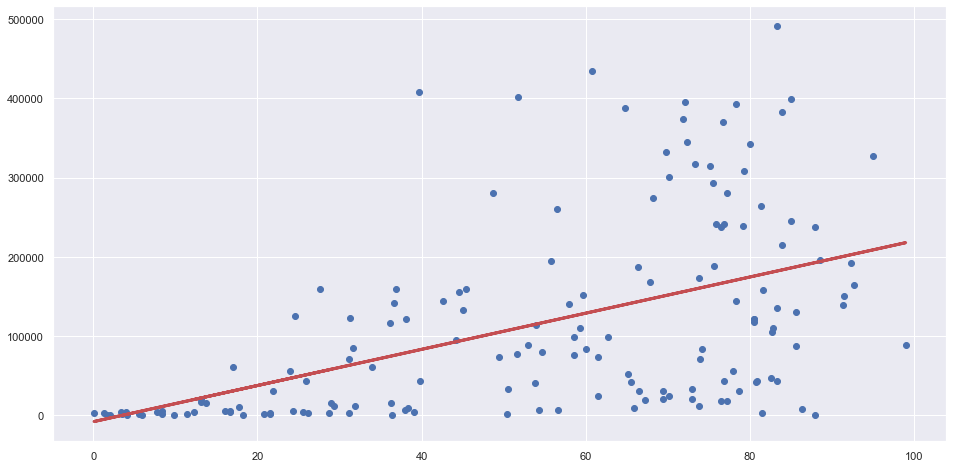

In [14]:
# Formula for the Regression line
regline_x = vax
regline_y = linreg.intercept_ + linreg.coef_ * vax

# Plot the Linear Regression line
f = plt.figure(figsize=(16, 8))
plt.scatter(vax, casepermil)
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
plt.show()

In [15]:
casepermil_pred = linreg.predict(vax)

# Explained Variance (R^2)
print("Explained Variance (R^2) \t:", linreg.score(vax, casepermil))

# Mean Squared Error (MSE)
def mean_sq_err(actual, predicted):
    '''Returns the Mean Squared Error of actual and predicted values'''
    return np.mean(np.square(np.array(actual) - np.array(predicted)))


mse = mean_sq_err(casepermil, casepermil_pred)
print("Mean Squared Error (MSE) \t:", mse)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))

Explained Variance (R^2) 	: 0.25725186175957493
Mean Squared Error (MSE) 	: 11110555565.82013
Root Mean Squared Error (RMSE) 	: 105406.62012331166


In [16]:
# Create a Linear Regression object for vax against deathrate
linreg1 = LinearRegression()

# Train the Linear Regression model 
linreg1.fit(vax, deathrate)

# Coefficients of the Linear Regression line
print('Intercept \t: b = ', linreg1.intercept_)
print('Coefficients \t: a = ', linreg1.coef_)

Intercept 	: b =  [2.79346604]
Coefficients 	: a =  [[-0.0221645]]


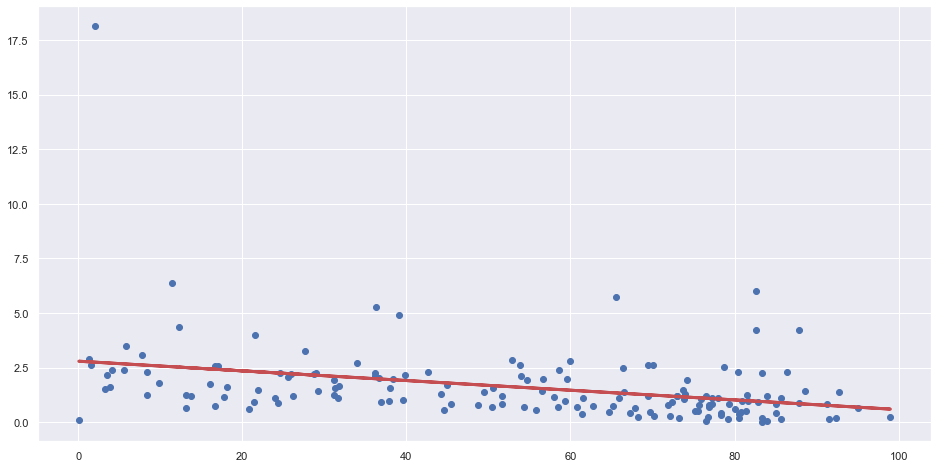

In [17]:
# Formula for the Regression line
regline_x = vax
regline_y = linreg1.intercept_ + linreg1.coef_ * vax

# Plot the Linear Regression line
f = plt.figure(figsize=(16, 8))
plt.scatter(vax, deathrate)
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
plt.show()

In [18]:
deathrate_pred = linreg1.predict(vax)

# Explained Variance (R^2)
print("Explained Variance (R^2) \t:", linreg1.score(vax, deathrate))

# Mean Squared Error (MSE)
def mean_sq_err(actual, predicted):
    '''Returns the Mean Squared Error of actual and predicted values'''
    return np.mean(np.square(np.array(actual) - np.array(predicted)))

mse = mean_sq_err(deathrate, deathrate_pred)
print("Mean Squared Error (MSE) \t:", mse)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))

Explained Variance (R^2) 	: 0.11595584485455046
Mean Squared Error (MSE) 	: 2.7717878794938664
Root Mean Squared Error (RMSE) 	: 1.6648687274058176


In [19]:
# Create a Linear Regression object for gdp per capita against total covid cases per mil
linreg2 = LinearRegression()

# Train the Linear Regression model 
linreg2.fit(gdp, casepermil)

# Coefficients of the Linear Regression line
print('Intercept \t: b = ', linreg2.intercept_)
print('Coefficients \t: a = ', linreg2.coef_)

Intercept 	: b =  [48272.28891686]
Coefficients 	: a =  [[3.4494961]]


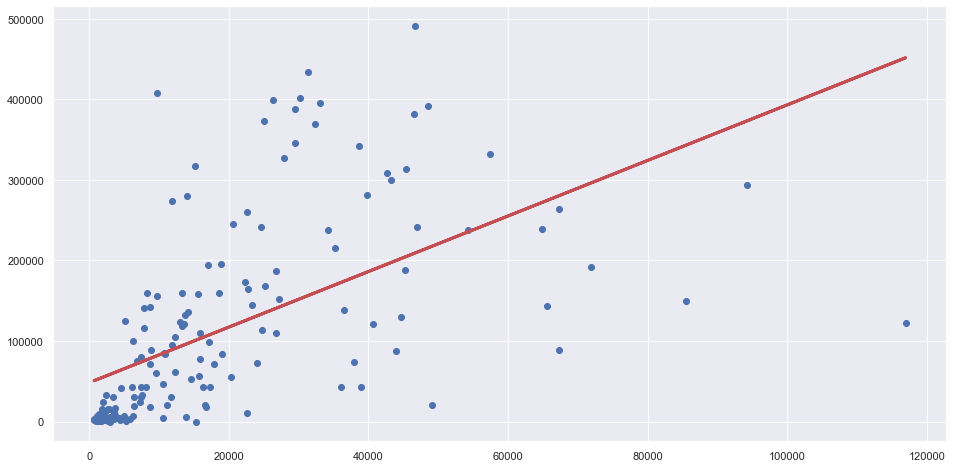

In [20]:
# Formula for the Regression line
regline_x = gdp
regline_y = linreg2.intercept_ + linreg2.coef_ * gdp

# Plot the Linear Regression line
f = plt.figure(figsize=(16, 8))
plt.scatter(gdp, casepermil)
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
plt.show()

In [21]:
casepermil_pred = linreg2.predict(gdp)

# Explained Variance (R^2)
print("Explained Variance (R^2) \t:", linreg2.score(gdp, casepermil))

# Mean Squared Error (MSE)
def mean_sq_err(actual, predicted):
    '''Returns the Mean Squared Error of actual and predicted values'''
    return np.mean(np.square(np.array(actual) - np.array(predicted)))

mse = mean_sq_err(casepermil, casepermil_pred)
print("Mean Squared Error (MSE) \t:", mse)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))

Explained Variance (R^2) 	: 0.3186778048837807
Mean Squared Error (MSE) 	: 10191702566.900217
Root Mean Squared Error (RMSE) 	: 100953.96261118341


In [22]:
# Create a Linear Regression object for population density against total covid cases per mil
linreg3 = LinearRegression()

# Train the Linear Regression model 
linreg3.fit(popden, casepermil)

# Coefficients of the Linear Regression line
print('Intercept \t: b = ', linreg3.intercept_)
print('Coefficients \t: a = ', linreg3.coef_)

Intercept 	: b =  [111029.89432473]
Coefficients 	: a =  [[14.18022432]]


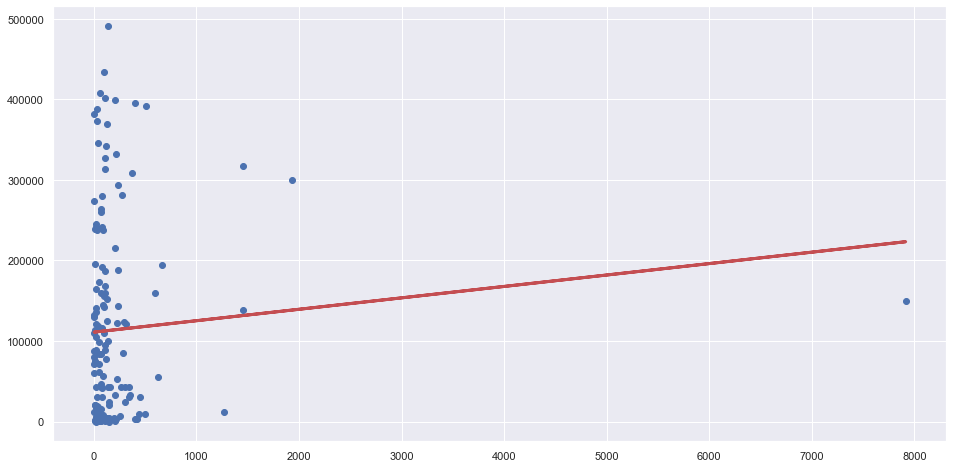

In [23]:
# Formula for the Regression line
regline_x = popden
regline_y = linreg3.intercept_ + linreg3.coef_ * popden

# Plot the Linear Regression line
f = plt.figure(figsize=(16, 8))
plt.scatter(popden, casepermil)
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
plt.show()

In [24]:
casepermil_pred = linreg3.predict(popden)

# Explained Variance (R^2)
print("Explained Variance (R^2) \t:", linreg3.score(popden, casepermil))

# Mean Squared Error (MSE)
def mean_sq_err(actual, predicted):
    '''Returns the Mean Squared Error of actual and predicted values'''
    return np.mean(np.square(np.array(actual) - np.array(predicted)))

mse = mean_sq_err(casepermil, casepermil_pred)
print("Mean Squared Error (MSE) \t:", mse)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))

Explained Variance (R^2) 	: 0.006034117655726368
Mean Squared Error (MSE) 	: 14868449475.319635
Root Mean Squared Error (RMSE) 	: 121936.25168636124


In [25]:
# Create a Linear Regression object for cardiovascular disease against deathrate
linreg4 = LinearRegression()

# Train the Linear Regression model 
linreg4.fit(cardio, deathrate)

# Coefficients of the Linear Regression line
print('Intercept \t: b = ', linreg4.intercept_)
print('Coefficients \t: a = ', linreg4.coef_)

Intercept 	: b =  [0.50874955]
Coefficients 	: a =  [[0.00422993]]


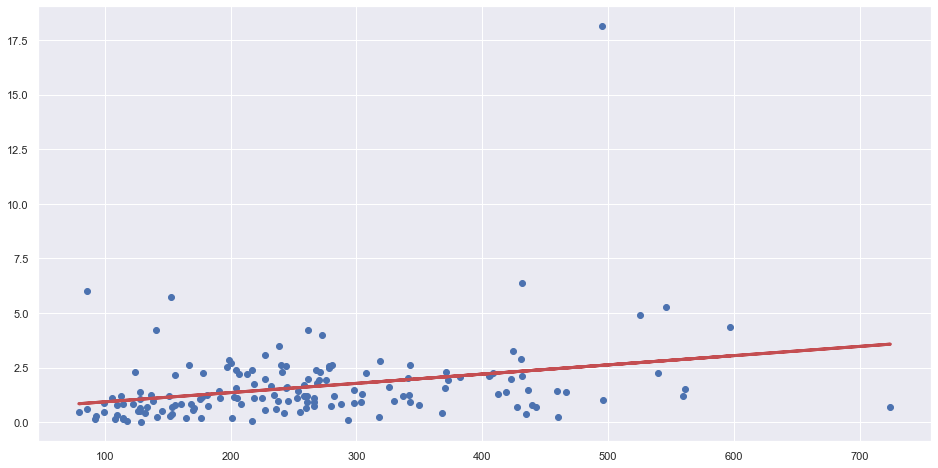

In [26]:
# Formula for the Regression line
regline_x = cardio
regline_y = linreg4.intercept_ + linreg4.coef_ * cardio

# Plot the Linear Regression line
f = plt.figure(figsize=(16, 8))
plt.scatter(cardio, deathrate)
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
plt.show()

In [27]:
deathrate_pred = linreg4.predict(cardio)

# Explained Variance (R^2)
print("Explained Variance (R^2) \t:", linreg4.score(cardio, deathrate))

# Mean Squared Error (MSE)
def mean_sq_err(actual, predicted):
    '''Returns the Mean Squared Error of actual and predicted values'''
    return np.mean(np.square(np.array(actual) - np.array(predicted)))

mse = mean_sq_err(deathrate, deathrate_pred)
print("Mean Squared Error (MSE) \t:", mse)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))

Explained Variance (R^2) 	: 0.08707117768947681
Mean Squared Error (MSE) 	: 2.8623514219203114
Root Mean Squared Error (RMSE) 	: 1.691848522155666


In [28]:
# Create a Linear Regression object for diabetes prevalence against deathrate
linreg5 = LinearRegression()

# Train the Linear Regression model 
linreg5.fit(diabetes_prev, deathrate)

# Coefficients of the Linear Regression line
print('Intercept \t: b = ', linreg5.intercept_)
print('Coefficients \t: a = ', linreg5.coef_)

Intercept 	: b =  [1.72402181]
Coefficients 	: a =  [[-0.01462329]]


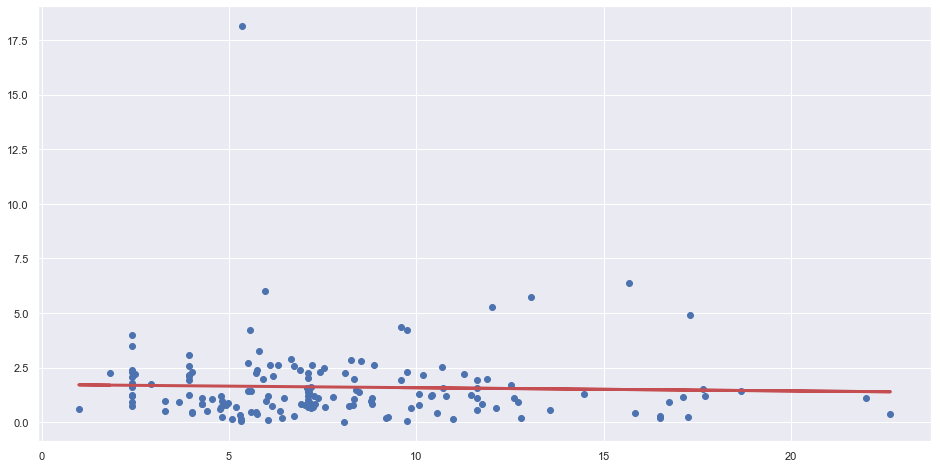

In [29]:
# Formula for the Regression line
regline_x = diabetes_prev
regline_y = linreg5.intercept_ + linreg5.coef_ * diabetes_prev

# Plot the Linear Regression line
f = plt.figure(figsize=(16, 8))
plt.scatter(diabetes_prev, deathrate)
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
plt.show()

In [30]:
deathrate_pred = linreg5.predict(diabetes_prev)

# Explained Variance (R^2)
print("Explained Variance (R^2) \t:", linreg5.score(diabetes_prev, deathrate))

# Mean Squared Error (MSE)
def mean_sq_err(actual, predicted):
    '''Returns the Mean Squared Error of actual and predicted values'''
    return np.mean(np.square(np.array(actual) - np.array(predicted)))

mse = mean_sq_err(deathrate, deathrate_pred)
print("Mean Squared Error (MSE) \t:", mse)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))

Explained Variance (R^2) 	: 0.0011918138058436556
Mean Squared Error (MSE) 	: 3.131613289131156
Root Mean Squared Error (RMSE) 	: 1.769636485024864


In [31]:
# Create a Linear Regression object for human development index against total covid cases per mil
linreg6 = LinearRegression()

# Train the Linear Regression model 
linreg6.fit(human_di, casepermil)

# Coefficients of the Linear Regression line
print('Intercept \t: b = ', linreg6.intercept_)
print('Coefficients \t: a = ', linreg6.coef_)

Intercept 	: b =  [-328344.07706287]
Coefficients 	: a =  [[607416.75564073]]


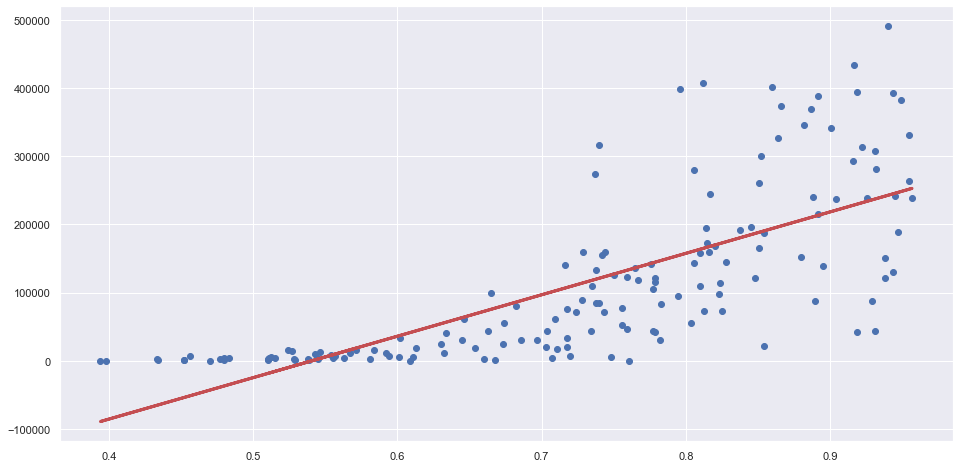

In [32]:
# Formula for the Regression line
regline_x = human_di
regline_y = linreg6.intercept_ + linreg6.coef_ * human_di

# Plot the Linear Regression line
f = plt.figure(figsize=(16, 8))
plt.scatter(human_di, casepermil)
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
plt.show()

In [33]:
casepermil_pred = linreg6.predict(human_di)

# Explained Variance (R^2)
print("Explained Variance (R^2) \t:", linreg6.score(human_di, casepermil))

# Mean Squared Error (MSE)
def mean_sq_err(actual, predicted):
    '''Returns the Mean Squared Error of actual and predicted values'''
    return np.mean(np.square(np.array(actual) - np.array(predicted)))

mse = mean_sq_err(casepermil, casepermil_pred)
print("Mean Squared Error (MSE) \t:", mse)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))

Explained Variance (R^2) 	: 0.5409472547408734
Mean Squared Error (MSE) 	: 6866837856.943693
Root Mean Squared Error (RMSE) 	: 82866.3855670301


In [34]:
# Create a Linear Regression object for human development index against death rate
linreg7 = LinearRegression()

# Train the Linear Regression model 
linreg7.fit(human_di, deathrate)

# Coefficients of the Linear Regression line
print('Intercept \t: b = ', linreg7.intercept_)
print('Coefficients \t: a = ', linreg7.coef_)

Intercept 	: b =  [4.76850077]
Coefficients 	: a =  [[-4.33884942]]


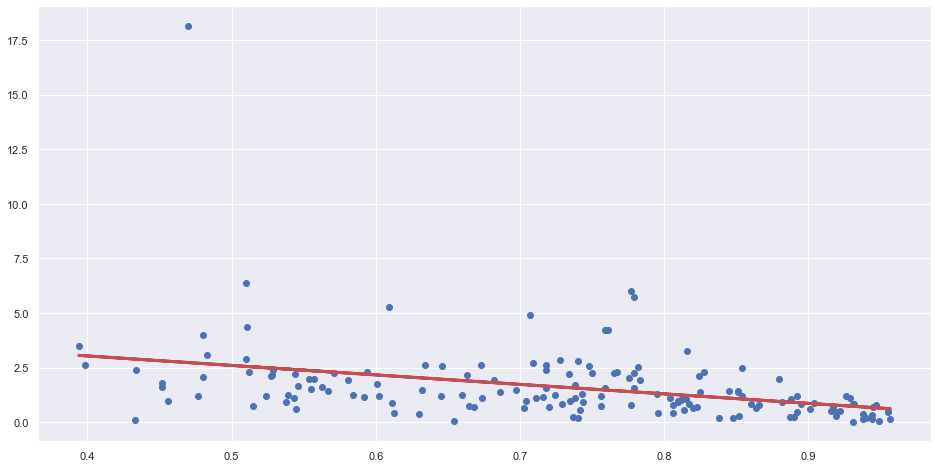

In [35]:
# Formula for the Regression line
regline_x = human_di
regline_y = linreg7.intercept_ + linreg7.coef_ * human_di

# Plot the Linear Regression line
f = plt.figure(figsize=(16, 8))
plt.scatter(human_di, deathrate)
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
plt.show()

In [36]:
deathrate_pred = linreg7.predict(human_di)

# Explained Variance (R^2)
print("Explained Variance (R^2) \t:", linreg7.score(human_di, deathrate))

# Mean Squared Error (MSE)
def mean_sq_err(actual, predicted):
    '''Returns the Mean Squared Error of actual and predicted values'''
    return np.mean(np.square(np.array(actual) - np.array(predicted)))

mse = mean_sq_err(deathrate, deathrate_pred)
print("Mean Squared Error (MSE) \t:", mse)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))

Explained Variance (R^2) 	: 0.13168572869753858
Mean Squared Error (MSE) 	: 2.722469187516691
Root Mean Squared Error (RMSE) 	: 1.6499906628574268


In [37]:
# Create a Linear Regression object for gdp against death rate
linreg8 = LinearRegression()

# Train the Linear Regression model 
linreg8.fit(gdp, deathrate)

# Coefficients of the Linear Regression line
print('Intercept \t: b = ', linreg8.intercept_)
print('Coefficients \t: a = ', linreg8.coef_)

Intercept 	: b =  [2.18117143]
Coefficients 	: a =  [[-3.00427529e-05]]


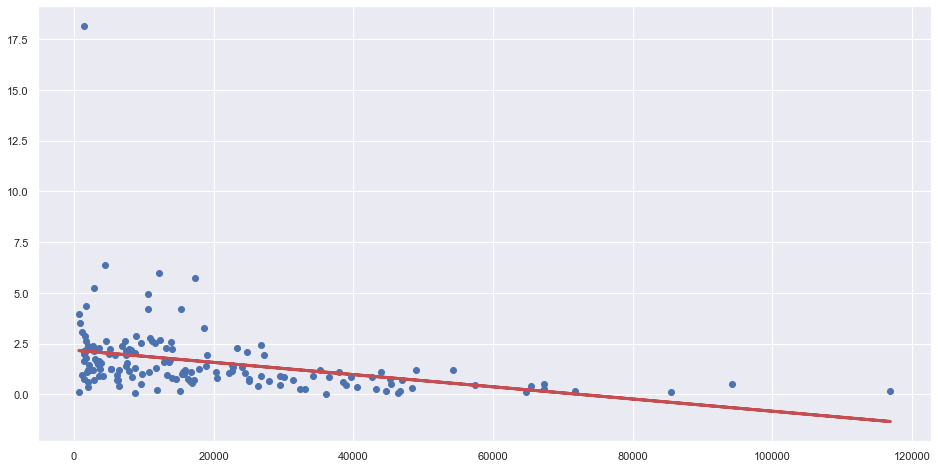

In [38]:
# Formula for the Regression line
regline_x = gdp
regline_y = linreg8.intercept_ + linreg8.coef_ * gdp

# Plot the Linear Regression line
f = plt.figure(figsize=(16, 8))
plt.scatter(gdp, deathrate)
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
plt.show()

In [39]:
deathrate_pred = linreg8.predict(gdp)

# Explained Variance (R^2)
print("Explained Variance (R^2) \t:", linreg8.score(gdp, deathrate))

# Mean Squared Error (MSE)
def mean_sq_err(actual, predicted):
    '''Returns the Mean Squared Error of actual and predicted values'''
    return np.mean(np.square(np.array(actual) - np.array(predicted)))

mse = mean_sq_err(deathrate, deathrate_pred)
print("Mean Squared Error (MSE) \t:", mse)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))

Explained Variance (R^2) 	: 0.11532623692252553
Mean Squared Error (MSE) 	: 2.7737619207503608
Root Mean Squared Error (RMSE) 	: 1.6654614738114961


In [40]:
# Create a Linear Regression object for population density against death rate
linreg9 = LinearRegression()

# Train the Linear Regression model 
linreg9.fit(popden, deathrate)

# Coefficients of the Linear Regression line
print('Intercept \t: b = ', linreg9.intercept_)
print('Coefficients \t: a = ', linreg9.coef_)

Intercept 	: b =  [1.67366334]
Coefficients 	: a =  [[-0.00031233]]


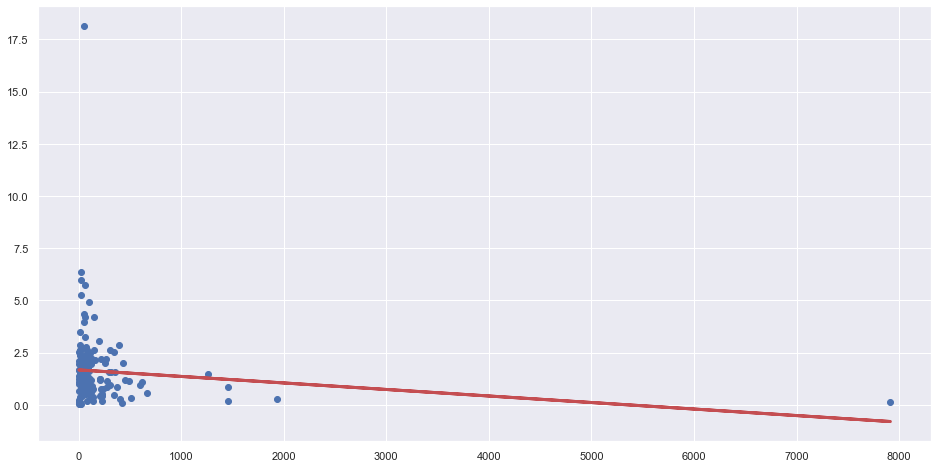

In [41]:
# Formula for the Regression line
regline_x = popden
regline_y = linreg9.intercept_ + linreg9.coef_ * popden

# Plot the Linear Regression line
f = plt.figure(figsize=(16, 8))
plt.scatter(popden, deathrate)
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
plt.show()

In [42]:
deathrate_pred = linreg9.predict(popden)

# Explained Variance (R^2)
print("Explained Variance (R^2) \t:", linreg9.score(popden, deathrate))

# Mean Squared Error (MSE)
def mean_sq_err(actual, predicted):
    '''Returns the Mean Squared Error of actual and predicted values'''
    return np.mean(np.square(np.array(actual) - np.array(predicted)))

mse = mean_sq_err(deathrate, deathrate_pred)
print("Mean Squared Error (MSE) \t:", mse)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))

Explained Variance (R^2) 	: 0.013966615647500458
Mean Squared Error (MSE) 	: 3.091559813632736
Root Mean Squared Error (RMSE) 	: 1.7582832006342823


<AxesSubplot:>

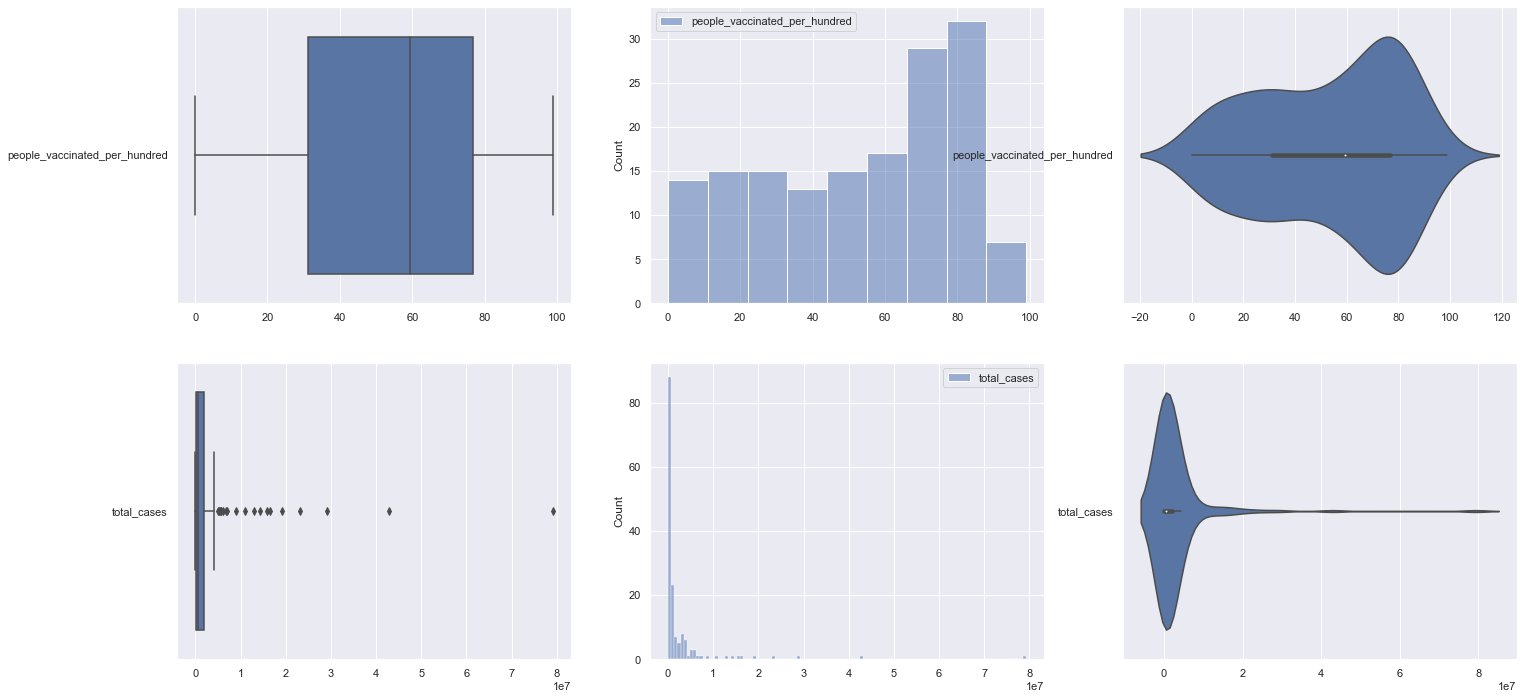

In [43]:
# Set up matplotlib figure with three subplots
f, axes = plt.subplots(2, 3, figsize=(24, 12))

# Plot the basic uni-variate figures for vax
sb.boxplot(data = vax, orient = "h", ax = axes[0,0])
sb.histplot(data = vax, ax = axes[0,1])
sb.violinplot(data = vax, orient = "h", ax = axes[0,2])

# Plot the basic uni-variate figures for case
sb.boxplot(data = case, orient = "h", ax = axes[1,0])
sb.histplot(data = case, ax = axes[1,1])
sb.violinplot(data = case, orient = "h", ax = axes[1,2])

<AxesSubplot:>

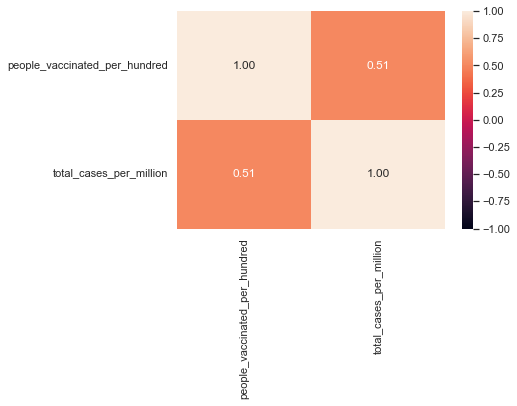

In [44]:
# Create a joint dataframe by concatenating the two variables
heatmap1 = pd.concat([vax, casepermil], axis = 1).reindex(vax.index)
# Calculate the correlation between the two columns/variables
sb.heatmap(heatmap1.corr(), vmin = -1, vmax = 1, annot = True, fmt=".2f")

<AxesSubplot:>

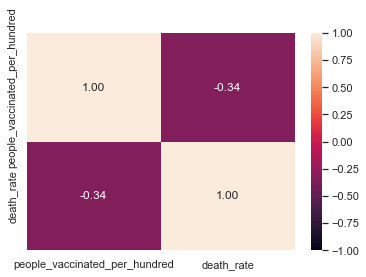

In [45]:
# Create a joint dataframe by concatenating the two variables
heatmap2 = pd.concat([vax, deathrate], axis = 1).reindex(vax.index)
# Calculate the correlation between the two columns/variables
sb.heatmap(heatmap2.corr(), vmin = -1, vmax = 1, annot = True, fmt=".2f")

<AxesSubplot:>

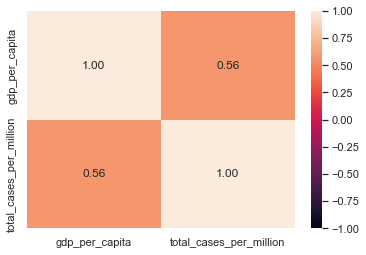

In [46]:
# Create a joint dataframe by concatenating the two variables
heatmap3 = pd.concat([gdp, casepermil], axis = 1).reindex(gdp.index)
# Calculate the correlation between the two columns/variables
sb.heatmap(heatmap3.corr(), vmin = -1, vmax = 1, annot = True, fmt=".2f")

<AxesSubplot:>

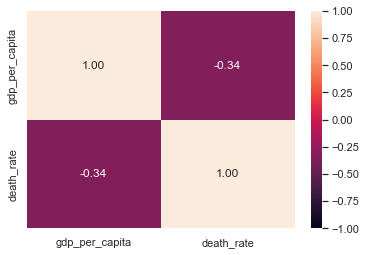

In [47]:
# Create a joint dataframe by concatenating the two variables
heatmap4 = pd.concat([gdp, deathrate], axis = 1).reindex(gdp.index)
# Calculate the correlation between the two columns/variables
sb.heatmap(heatmap4.corr(), vmin = -1, vmax = 1, annot = True, fmt=".2f")

<AxesSubplot:>

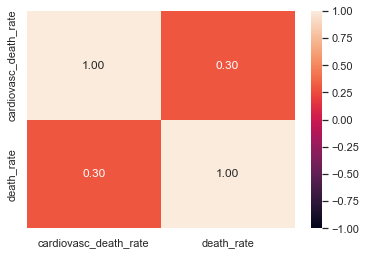

In [48]:
# Create a joint dataframe by concatenating the two variables
heatmap5 = pd.concat([cardio, deathrate], axis = 1).reindex(cardio.index)
# Calculate the correlation between the two columns/variables
sb.heatmap(heatmap5.corr(), vmin = -1, vmax = 1, annot = True, fmt=".2f")

<AxesSubplot:>

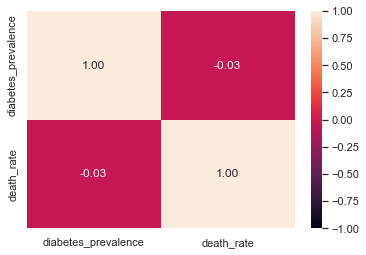

In [49]:
# Create a joint dataframe by concatenating the two variables
heatmap6 = pd.concat([diabetes_prev, deathrate], axis = 1).reindex(diabetes_prev.index)
# Calculate the correlation between the two columns/variables
sb.heatmap(heatmap6.corr(), vmin = -1, vmax = 1, annot = True, fmt=".2f")

<AxesSubplot:>

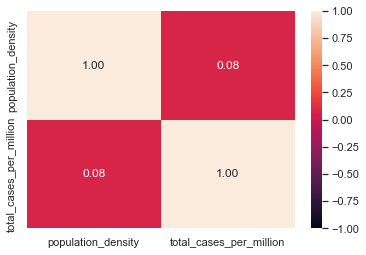

In [50]:
# Create a joint dataframe by concatenating the two variables
heatmap7 = pd.concat([popden, casepermil], axis = 1).reindex(popden.index)
# Calculate the correlation between the two columns/variables
sb.heatmap(heatmap7.corr(), vmin = -1, vmax = 1, annot = True, fmt=".2f")

<AxesSubplot:>

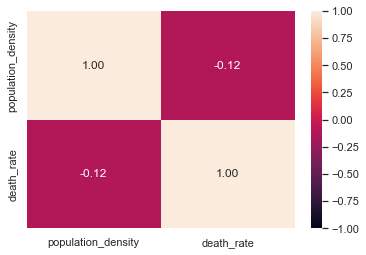

In [51]:
# Create a joint dataframe by concatenating the two variables
heatmap8 = pd.concat([popden, deathrate], axis = 1).reindex(popden.index)
# Calculate the correlation between the two columns/variables
sb.heatmap(heatmap8.corr(), vmin = -1, vmax = 1, annot = True, fmt=".2f")

<AxesSubplot:>

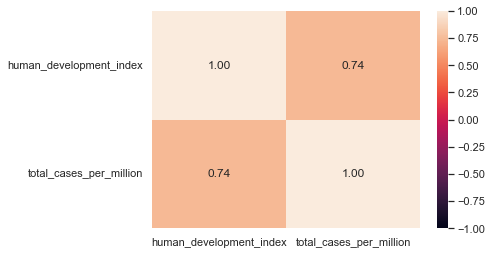

In [52]:
# Create a joint dataframe by concatenating the two variables
heatmap9 = pd.concat([human_di, casepermil], axis = 1).reindex(human_di.index)
# Calculate the correlation between the two columns/variables
sb.heatmap(heatmap9.corr(), vmin = -1, vmax = 1, annot = True, fmt=".2f")

<AxesSubplot:>

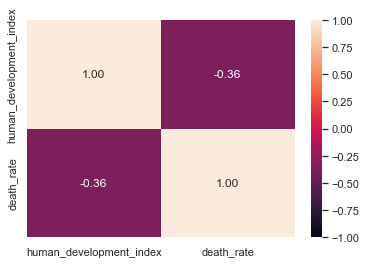

In [53]:
# Create a joint dataframe by concatenating the two variables
heatmap10 = pd.concat([human_di, deathrate], axis = 1).reindex(human_di.index)
# Calculate the correlation between the two columns/variables
sb.heatmap(heatmap10.corr(), vmin = -1, vmax = 1, annot = True, fmt=".2f")

In [54]:
"""
vax = pd.DataFrame(temp8['people_vaccinated_per_hundred'])
case = pd.DataFrame(temp8['total_cases']) 
casepermil = pd.DataFrame(temp8['total_cases_per_million']) 
deathrate = pd.DataFrame(temp8['death_rate']) 
gdp = pd.DataFrame(temp8['gdp_per_capita']) 
popden = pd.DataFrame(temp8['population_density']) 
cardio = pd.DataFrame(temp8['cardiovasc_death_rate']) 
diabetes_prev = pd.DataFrame(temp8['diabetes_prevalence']) 
life_expt = pd.DataFrame(temp8['life_expectancy']) 
human_di = pd.DataFrame(temp8['human_development_index'])
"""
human_di.describe()

,human_development_index
count,157.000000
mean,0.728178
std,0.148568
min,0.394000
25%,0.609000
50%,0.743000
75%,0.848000
max,0.957000


In [55]:
"""
# Explained Variance (R^2)
print("Explained Variance (R^2) \t:", linreg.score(hp_train, total_train))

# Mean Squared Error (MSE)
def mean_sq_err(actual, predicted):
    '''Returns the Mean Squared Error of actual and predicted values'''
    return np.mean(np.square(np.array(actual) - np.array(predicted)))


mse = mean_sq_err(total_train, total_train_pred)
print("Mean Squared Error (MSE) \t:", mse)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))
"""

'''
done for all the variables individually
'''

'\ndone for all the variables individually\n'

In [56]:
temp8_withoutsg = temp8.drop(labels = 127, axis = 0)
temp8_withoutsg = temp8_withoutsg.reset_index(drop=True)
temp8_withoutsg

,Country,continent,total_deaths,total_cases,death_rate,total_cases_per_million,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,gdp_per_capita,population_density,cardiovasc_death_rate,diabetes_prevalence,life_expectancy,human_development_index
0,AFGHANISTAN,Asia,7622.0,174331.0,4.37,4376.280,12.32,10.62,1803.987,54.422,597.029,9.59,64.83,0.511
1,ALBANIA,Europe,3478.0,272030.0,1.28,94687.173,44.23,41.73,11803.431,104.871,304.195,10.08,78.57,0.795
2,ALGERIA,Africa,6853.0,265227.0,2.58,5944.578,16.71,13.62,13913.839,17.348,278.364,6.73,76.88,0.748
3,ANGOLA,Africa,1900.0,98796.0,1.92,2911.450,31.21,16.06,5819.495,23.890,276.045,3.94,61.15,0.581
4,ARGENTINA,South America,126708.0,8934328.0,1.42,195903.229,88.59,79.39,18933.907,16.177,191.032,5.50,76.67,0.845
5,ARMENIA,Asia,8528.0,421226.0,2.02,141916.386,36.64,31.03,8787.580,102.931,341.010,7.11,75.09,0.776
6,AUSTRALIA,Oceania,5416.0,3362035.0,0.16,130370.975,85.66,79.57,44648.710,3.202,107.791,5.07,83.44,0.944
7,AUSTRIA,Europe,14986.0,2839297.0,0.53,313974.831,75.20,72.62,45436.686,106.749,145.183,6.35,81.54,0.922
8,AZERBAIJAN,Asia,9500.0,788958.0,1.20,77172.205,51.65,46.68,15847.419,119.309,559.812,7.11,73.00,0.756
9,BAHRAIN,Asia,1498.0,525171.0,0.29,300390.380,70.20,68.49,43290.705,1935.907,151.689,16.52,77.29,0.852


In [57]:
popden_wo_sg = pd.DataFrame(temp8_withoutsg['population_density']) 
casepermil_wo_sg = pd.DataFrame(temp8_withoutsg['total_cases_per_million']) 
deathrate_wo_sg = pd.DataFrame(temp8_withoutsg['death_rate']) 

In [58]:
# Create a Linear Regression object for population density against death rate
linreg10 = LinearRegression()

# Train the Linear Regression model 
linreg10.fit(popden_wo_sg, deathrate_wo_sg)

# Coefficients of the Linear Regression line
print('Intercept \t: b = ', linreg10.intercept_)
print('Coefficients \t: a = ', linreg10.coef_)

Intercept 	: b =  [1.77405677]
Coefficients 	: a =  [[-0.00098766]]


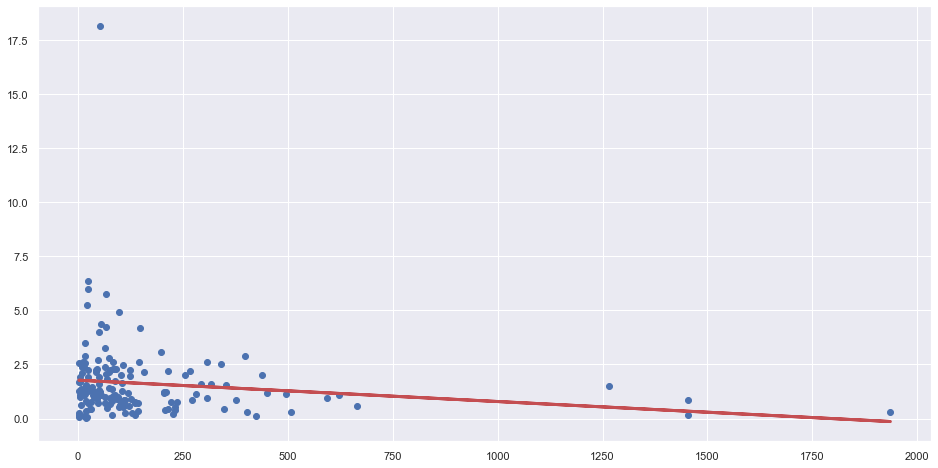

In [59]:
# Formula for the Regression line
regline_x = popden_wo_sg
regline_y = linreg10.intercept_ + linreg10.coef_ * popden_wo_sg

# Plot the Linear Regression line
f = plt.figure(figsize=(16, 8))
plt.scatter(popden_wo_sg, deathrate_wo_sg)
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
plt.show()

In [60]:
deathrate_wo_sg_pred = linreg10.predict(popden_wo_sg)

# Explained Variance (R^2)
print("Explained Variance (R^2) \t:", linreg10.score(popden_wo_sg, deathrate_wo_sg))

# Mean Squared Error (MSE)
def mean_sq_err(actual, predicted):
    '''Returns the Mean Squared Error of actual and predicted values'''
    return np.mean(np.square(np.array(actual) - np.array(predicted)))

mse = mean_sq_err(deathrate_wo_sg, deathrate_wo_sg_pred)
print("Mean Squared Error (MSE) \t:", mse)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))

Explained Variance (R^2) 	: 0.02123689175304888
Mean Squared Error (MSE) 	: 3.0746234416878075
Root Mean Squared Error (RMSE) 	: 1.7534604191962269


<AxesSubplot:>

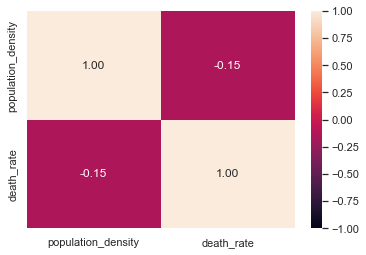

In [61]:
# Create a joint dataframe by concatenating the two variables
heatmap11 = pd.concat([popden_wo_sg, deathrate_wo_sg], axis = 1).reindex(popden_wo_sg.index)
# Calculate the correlation between the two columns/variables
sb.heatmap(heatmap11.corr(), vmin = -1, vmax = 1, annot = True, fmt=".2f")

In [62]:
# Create a Linear Regression object for population density against case per mil
linreg11 = LinearRegression()

# Train the Linear Regression model 
linreg11.fit(popden_wo_sg, casepermil_wo_sg)

# Coefficients of the Linear Regression line
print('Intercept \t: b = ', linreg11.intercept_)
print('Coefficients \t: a = ', linreg11.coef_)

Intercept 	: b =  [103140.60318778]
Coefficients 	: a =  [[67.24963696]]


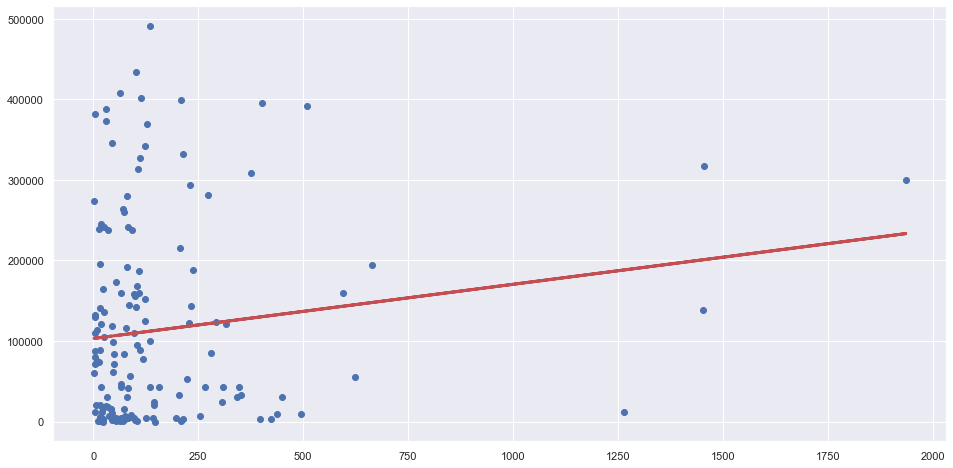

In [63]:
# Formula for the Regression line
regline_x = popden_wo_sg
regline_y = linreg11.intercept_ + linreg11.coef_ * popden_wo_sg

# Plot the Linear Regression line
f = plt.figure(figsize=(16, 8))
plt.scatter(popden_wo_sg, casepermil_wo_sg)
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
plt.show()

In [64]:
casepermil_wo_sg_pred = linreg11.predict(popden_wo_sg)

# Explained Variance (R^2)
print("Explained Variance (R^2) \t:", linreg11.score(popden_wo_sg, casepermil_wo_sg))

# Mean Squared Error (MSE)
def mean_sq_err(actual, predicted):
    '''Returns the Mean Squared Error of actual and predicted values'''
    return np.mean(np.square(np.array(actual) - np.array(predicted)))

mse = mean_sq_err(casepermil_wo_sg, casepermil_wo_sg_pred)
print("Mean Squared Error (MSE) \t:", mse)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))

Explained Variance (R^2) 	: 0.020556554357172074
Mean Squared Error (MSE) 	: 14736788844.561954
Root Mean Squared Error (RMSE) 	: 121395.17636447486


<AxesSubplot:>

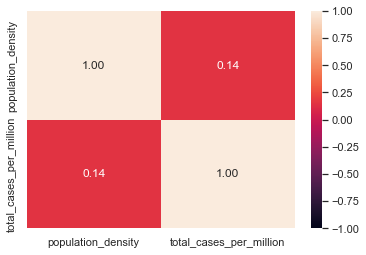

In [65]:
# Create a joint dataframe by concatenating the two variables
heatmap12 = pd.concat([popden_wo_sg, casepermil_wo_sg], axis = 1).reindex(popden_wo_sg.index)
# Calculate the correlation between the two columns/variables
sb.heatmap(heatmap12.corr(), vmin = -1, vmax = 1, annot = True, fmt=".2f")

In [66]:
# Create a Linear Regression object for life expectancy against death rate
linreg11 = LinearRegression()

# Train the Linear Regression model 
linreg11.fit(life_expt, deathrate)

# Coefficients of the Linear Regression line
print('Intercept \t: b = ', linreg11.intercept_)
print('Coefficients \t: a = ', linreg11.coef_)

Intercept 	: b =  [6.26933719]
Coefficients 	: a =  [[-0.0639143]]


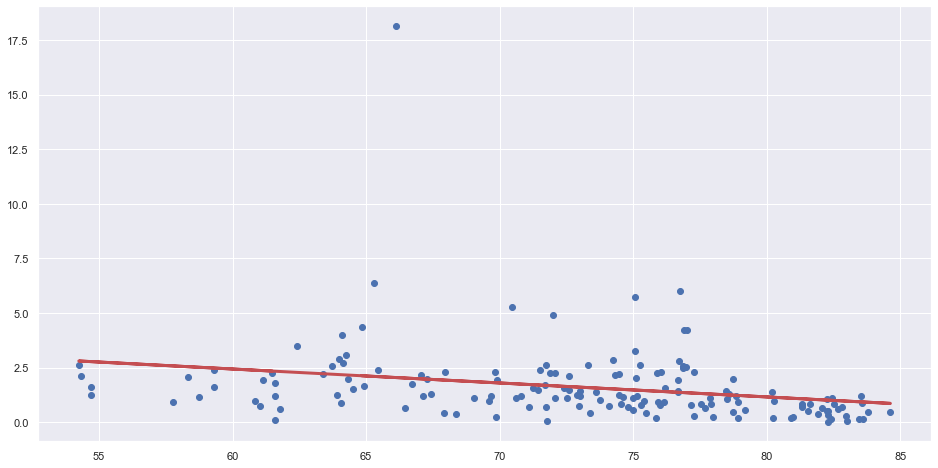

In [67]:
# Formula for the Regression line
regline_x = life_expt
regline_y = linreg11.intercept_ + linreg11.coef_ * life_expt

# Plot the Linear Regression line
f = plt.figure(figsize=(16, 8))
plt.scatter(life_expt, deathrate)
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
plt.show()

In [68]:
deathrate_pred = linreg11.predict(life_expt)

# Explained Variance (R^2)
print("Explained Variance (R^2) \t:", linreg11.score(life_expt, deathrate))

# Mean Squared Error (MSE)
def mean_sq_err(actual, predicted):
    '''Returns the Mean Squared Error of actual and predicted values'''
    return np.mean(np.square(np.array(actual) - np.array(predicted)))

mse = mean_sq_err(deathrate, deathrate_pred)
print("Mean Squared Error (MSE) \t:", mse)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))

Explained Variance (R^2) 	: 0.06979418319861064
Mean Squared Error (MSE) 	: 2.9165208473332154
Root Mean Squared Error (RMSE) 	: 1.7077824355968811


<AxesSubplot:>

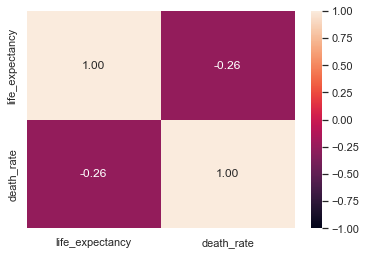

In [69]:
# Create a joint dataframe by concatenating the two variables
heatmap13 = pd.concat([life_expt, deathrate], axis = 1).reindex(life_expt.index)
# Calculate the correlation between the two columns/variables
sb.heatmap(heatmap13.corr(), vmin = -1, vmax = 1, annot = True, fmt=".2f")

In [70]:
# Create a Linear Regression object for life expectancy against death rate
linreg12 = LinearRegression()

# Train the Linear Regression model 
linreg12.fit(life_expt, casepermil)

# Coefficients of the Linear Regression line
print('Intercept \t: b = ', linreg12.intercept_)
print('Coefficients \t: a = ', linreg12.coef_)

Intercept 	: b =  [-683390.86988834]
Coefficients 	: a =  [[10935.4406418]]


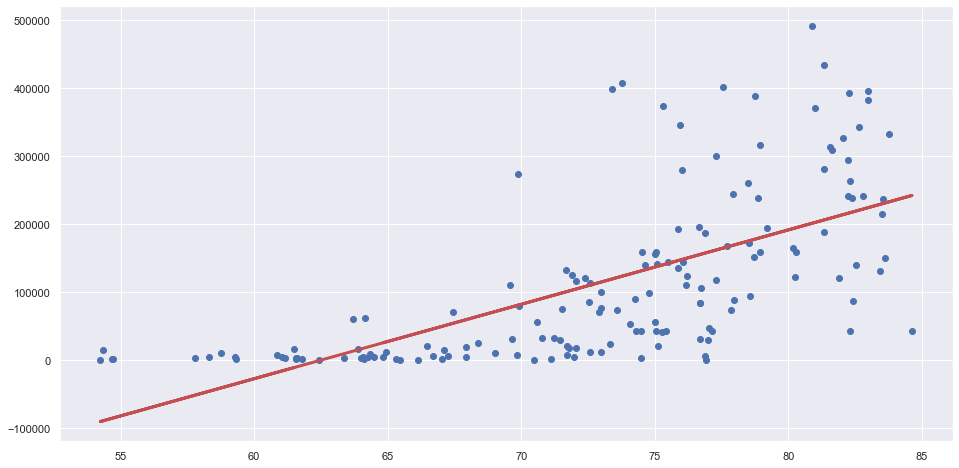

In [71]:
# Formula for the Regression line
regline_x = life_expt
regline_y = linreg12.intercept_ + linreg12.coef_ * life_expt

# Plot the Linear Regression line
f = plt.figure(figsize=(16, 8))
plt.scatter(life_expt, casepermil)
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
plt.show()

In [72]:
casepermil_pred = linreg12.predict(life_expt)

# Explained Variance (R^2)
print("Explained Variance (R^2) \t:", linreg12.score(life_expt, casepermil))

# Mean Squared Error (MSE)
def mean_sq_err(actual, predicted):
    '''Returns the Mean Squared Error of actual and predicted values'''
    return np.mean(np.square(np.array(actual) - np.array(predicted)))

mse = mean_sq_err(casepermil, casepermil_pred)
print("Mean Squared Error (MSE) \t:", mse)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))

Explained Variance (R^2) 	: 0.4282403740193287
Mean Squared Error (MSE) 	: 8552787637.812265
Root Mean Squared Error (RMSE) 	: 92481.28263498655


<AxesSubplot:>

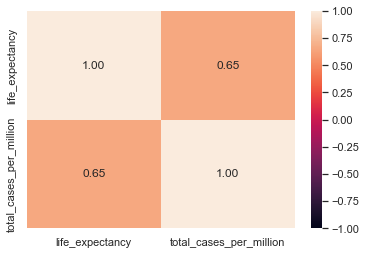

In [73]:
# Create a joint dataframe by concatenating the two variables
heatmap14 = pd.concat([life_expt, casepermil], axis = 1).reindex(life_expt.index)
# Calculate the correlation between the two columns/variables
sb.heatmap(heatmap14.corr(), vmin = -1, vmax = 1, annot = True, fmt=".2f")